# Undersampling & Oversampling

Undersampling aims to decrease the number of instances from the overrepresented class in a data set, they are said to be unbalanced. Unbalanced refers to highly unequal or uneven distribution of classes. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from imblearn.over_sampling import SMOTE #Using nearest neighbors algorithm to generate new and synthetic data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing random forest module

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from preprocessing_ml import *

Importing the preprocessing module for the Exeter NatSci Machine Learning Group.....
Successfully imported the preprocessing module


In [2]:
###Importing the data
dataframe = pd.read_csv("framingham.csv")

In [3]:
###Seeing the difference between CHD after 10 years and no-CHD.

CHD_count = dataframe.TenYearCHD.value_counts() #Shows the count of no-CHD and CHD after 10 y
print('The CHD after ten years has a ratio of approximately {} to 1.'.format(int(CHD_count[0] / CHD_count[1])))

The CHD after ten years has a ratio of approximately 5 to 1.


In [4]:
def preprocessing(dataframe, features, n):
    dataframe = chose_features(dataframe, features = features, n_features = n, vv = 1)
    dataframe = drop_missing(dataframe, v = 1)
    return dataframe

features = ['sysBP', 'age', 'cigsPerDay', 'totChol', 'diaBP', 'prevalentHyp', 'diabetes', 'BPMeds', 'male', 'BMI', 'TenYearCHD']
dataframe = preprocessing(dataframe, features, -1)

#dataframe = preprocessing(dataframe, 12)
#dataframe = dataframe.drop(['glucose'], axis=1);

Now selecting chosen features....
	 * Chosen features:  ['sysBP', 'age', 'cigsPerDay', 'totChol', 'diaBP', 'prevalentHyp', 'diabetes', 'BPMeds', 'male', 'BMI', 'TenYearCHD']
	 * Dropped features:  ['education', 'currentSmoker', 'prevalentStroke', 'heartRate', 'glucose']
Now dropping rows with missing values....
	 * Dropped 149 rows 3.5%. 4091 rows remaining



In [5]:
def scores(name, y_test, pred, v):
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    if v == 'y':
        print("The accuracy score for {} is: {}%.".format(name, round(accuracy, 3) * 100))
        print("The f1 score for {} is: {}%.".format(name, round(f1, 3) * 100))
        print("The precision score for {} is: {}%.".format(name, round(precision, 3) * 100))
        print("The recall score for {} is: {}%.".format(name, round(recall, 3) * 100))        
        return(accuracy, f1, precision, recall)
    elif v == 'n':
        return(accuracy, f1, precision, recall)
    else:
        print("Error: please choose 'y' or 'n'.")

In [6]:
def confusion(dataframe, name):
    sns.heatmap(pd.DataFrame(dataframe), annot=True , fmt='g')
    plt.title('Confusion matrix {}\n'.format(name), y=1.1)

In [49]:
def model(classifier, name, X_train, X_test, y_train, y_test, v):
    classifier.fit(X_train, y_train)
    classifier_pred = classifier.predict(X_test)
    score = scores(name, y_test, classifier_pred, v)

    accuracy = score[0]
    f1 = score[1]
    precision = score[2]
    recall = score[3]
    
    confusion(confusion_matrix(y_test, classifier_pred), name)

    return(accuracy, f1, precision, recall)

In [50]:
def oversample(dataframe, ratio):
    X_train, X_test, y_train, y_test = split_data(dataframe, dep_var='TenYearCHD', test_size = 0.2, v = 1, r_state = 0)
    sm = SMOTE(random_state = 0, ratio = ratio)
    X_train, y_train = sm.fit_sample(X_train, y_train)
    model(RandomForestClassifier(n_estimators=120, bootstrap=True), 'Random Forest', X_train, X_test, y_train, y_test, 'y');

In [51]:
def no_resample(dataframe):
    X_train, X_test, y_train, y_test = split_data(dataframe, dep_var='TenYearCHD', test_size = 0.2, v = 1, r_state = 0)
    model(RandomForestClassifier(n_estimators=120, bootstrap=True), 'Random Forest', X_train, X_test, y_train, y_test, 'y');

In [52]:
def undersample(dataframe, ratio):
    dataframe = dataframe.sample(frac=1,random_state=1)
    
    CHD_count = dataframe.TenYearCHD.value_counts()

    CHD_data = dataframe.loc[dataframe['TenYearCHD'] == 1]
    non_CHD_data = dataframe.loc[dataframe['TenYearCHD'] == 0].sample(n = (CHD_count[1]), random_state = 1)
    
    dataframe = pd.concat([CHD_data, non_CHD_data])
    
    CHD_count = dataframe.TenYearCHD.value_counts() #Shows the count of no-CHD and CHD after 10 y
    print('The CHD after ten years has a ratio of approximately {} to 1.'.format(int(CHD_count[0] / CHD_count[1])))
    
    X_train, X_test, y_train, y_test = split_data(dataframe, dep_var='TenYearCHD', test_size = 0.2, v = 1, r_state = 0)
    model(RandomForestClassifier(n_estimators=120, bootstrap=True), 'Random Forest', X_train, X_test, y_train, y_test, 'y');

In [ ]:
no_resample(dataframe)

In [ ]:
oversample(dataframe, 1)

In [ ]:
undersample(dataframe, 1)

In [ ]:
def lewis_3():
    new_dataframe = dataframe
    X_train, X_test, y_train, y_test = split_data(new_dataframe, dep_var='TenYearCHD', test_size = 0.2, v = 1, r_state = 100)
    train_data = X_train
    train_data['TenYearCHD'] = y_train
    train_data = upsample(train_data)
    
    X_train = train_data.iloc[:,-1]
    print(X_train)
    y_train = train_data.iloc[:,:-1]
    print(y_train)
    
    model(RandomForestClassifier(n_estimators=100, bootstrap=True), 'Random Forest', X_train, X_test, y_train, y_test, 'y');

In [ ]:
lewis_3()

In [ ]:
def lewis():
    new_dataframe = upsample(dataframe)
    X_train, X_test, y_train, y_test = split_data(new_dataframe, dep_var='TenYearCHD', test_size = 0.2, v = 1, r_state = 100)
    model(RandomForestClassifier(n_estimators=100, bootstrap=True), 'Random Forest', X_train, X_test, y_train, y_test, 'y');

In [ ]:
lewis()

In [ ]:
def lewis_2():
    new_dataframe = downsample(dataframe)
    X_train, X_test, y_train, y_test = split_data(new_dataframe, dep_var='TenYearCHD', test_size = 0.2, v = 1, r_state = 0)
    model(RandomForestClassifier(n_estimators=120, bootstrap=True), 'Random Forest', X_train, X_test, y_train, y_test, 'y');

In [ ]:
lewis_2()

In [55]:
def new(dataframe):
    np.random.seed(0)
    msk = np.random.rand(len(dataframe)) < 0.8
    train_data = dataframe[msk]
    test_data = dataframe[~msk]
    new_train = upsample(train_data)
    
    X_train = new_train.drop('TenYearCHD', axis = 1)
    y_train = new_train[['TenYearCHD']].copy()
    X_test = test_data.drop('TenYearCHD', axis = 1)
    y_test = test_data[['TenYearCHD']].copy()
    
    y_train = y_train.values.ravel()
    
    model(RandomForestClassifier(n_estimators=100, bootstrap=True), 'Random Forest', X_train, X_test, y_train, y_test, 'y');

The accuracy score for Random Forest is: 82.8%.
The f1 score for Random Forest is: 21.7%.
The precision score for Random Forest is: 37.0%.
The recall score for Random Forest is: 15.4%.


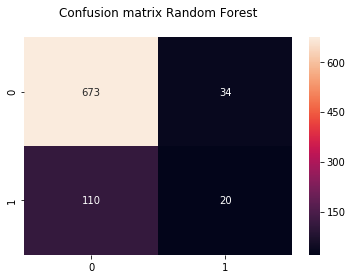

In [56]:
new(dataframe)

In [110]:
def new_2(dataframe):
    np.random.seed(0)
    msk = np.random.rand(len(dataframe)) < 0.8
    train_data = dataframe[msk]
    print(train_data.shape)
    test_data = dataframe[~msk]
    print(test_data.shape)
    
    X_train = train_data.drop('TenYearCHD', axis = 1)
    y_train = train_data[['TenYearCHD']].copy()
    X_test = test_data.drop('TenYearCHD', axis = 1)
    y_test = test_data[['TenYearCHD']].copy()
    
    y_train = y_train.values.ravel()
    
    sm = SMOTE(random_state = 0, ratio = 1)
    X_train, y_train = sm.fit_sample(X_train, y_train)
    
    model_new(RandomForestClassifier(n_estimators=100, bootstrap=True), 'Random Forest', X_train, X_test, y_train, y_test, 'y');

(3254, 11)
(837, 11)
The accuracy score for Random Forest is: 80.5%.
The f1 score for Random Forest is: 22.0%.
The precision score for Random Forest is: 29.099999999999998%.
The recall score for Random Forest is: 17.7%.


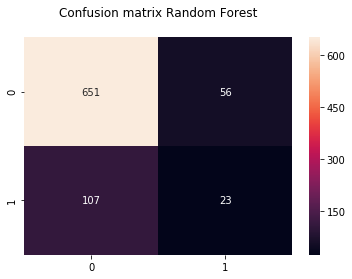

In [111]:
new_2(dataframe)

In [109]:
def model_new(classifier, name, X_train, X_test, y_train, y_test, v):
    classifier.fit(X_train, y_train)
    classifier_pred = classifier.predict(X_test)

    
    predictions = classifier.predict_proba(X_test)
    predicted = (predictions[:,1] >= 0.5).astype('int')

    score = scores(name, y_test, predicted, v)
    
    accuracy = score[0]
    f1 = score[1]
    precision = score[2]
    recall = score[3]
    
    confusion(confusion_matrix(y_test, predicted), name)

    return(accuracy, f1, precision, recall)